In [15]:
import json
import numpy as np
from domain_objects import GameParams, NewAgent
from new_guessing_game import RandomFunctions, run_simulation, new_random_f, select_speaker, select_hearer, avg_series

In [16]:
params = {"population_size":6, "stimulus": "quotient", "max_num": 100, "discriminative_threshold": 0.95, "discriminative_history_length": 50, "delta_inc": 0.2, "delta_dec": 0.2, "delta_inh": 0.2, "alpha": 0.01, "super_alpha": 0.001, "beta": 0.2, "steps": 2500, "runs": 1, "guessing_game_2": False, "seed": 0}
params = GameParams(**params)

r = next(new_random_f(seed=params.seed))
agg_cs1 = []
agg_ds = []

population, states_sequences, states_cnts = run_simulation(params, r.shuffle_list_random_function(), r.flip_a_coin_random_function(), r.pick_element_random_function())

windowed_communicative_success1 = np.array([avg_series(a.get_communicative_success1()) for a in population])*100
windowed_communicative_success2 = [avg_series(a.get_communicative_success2()) for a in population]
windowed_discriminative_success = np.array([avg_series(a.get_discriminative_success()) for a in population])*100


100%|██████████| 2500/2500 [00:04<00:00, 596.31it/s]


In [17]:
averaged_windowed_communicative_success1 = np.mean(windowed_communicative_success1, axis=0)
averaged_windowed_discriminative_success = np.mean(windowed_discriminative_success, axis=0)

# Visualizations

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
json.dumps(NewAgent.to_dict(population[0]))

'{"agent_id": 1, "categories": [{"category_id": 0, "is_active": true, "reactive_units": [[33, 35], [32, 99], [53, 56], [21, 65], [21, 58], [14, 41], [75, 82], [18, 59], [23, 56], [78, 85], [41, 46], [80, 89], [83, 84], [8, 23], [64, 73]], "weights": [9.05985479548887, 24.654545918497625, 9.268009318096302, 24.686553955940266, 24.319317669173515, 24.434141880237377, 11.29047110506222, 25.149424195498305, 16.25912413274975, 11.036603406613873, 10.648669850579964, 12.161460979831217, 6.212301307296105, 22.355496137860868, 10.474140268324264]}, {"category_id": 1, "is_active": true, "reactive_units": [[26, 55], [40, 91]], "weights": [22.499372486808618, 14.359424642444583]}, {"category_id": 2, "is_active": true, "reactive_units": [[56, 79]], "weights": [17.518944679366562]}, {"category_id": 3, "is_active": true, "reactive_units": [[62, 73]], "weights": [2.098583194211032]}, {"category_id": 4, "is_active": true, "reactive_units": [[3, 100], [4, 65], [1, 97]], "weights": [24.31483257973244, 2

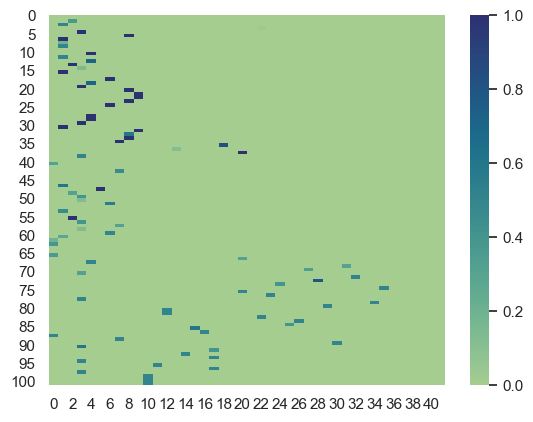

In [20]:
lxc = np.array(d['lxc'])
sns.set()
ax = sns.heatmap(lxc, vmin=0, vmax=1, cmap="crest")
plt.show()

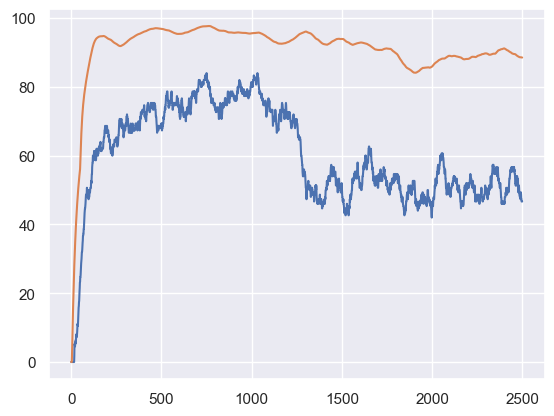

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(len(averaged_windowed_communicative_success1)), averaged_windowed_communicative_success1)
plt.plot(range(len(averaged_windowed_discriminative_success)), averaged_windowed_discriminative_success)

plt.show()
